In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# drive.mount('/content/drive')

In [2]:
# Read the CSV file directly from the Google Drive link and set the first column as the index
df = pd.read_csv('https://drive.google.com/uc?id=1ShdsxyO68i63JhXdz29yQfoocOhnWV_R', index_col=0)


In [3]:
df

,state,market,commodity,variety,modal_price,Date
0,Odisha,Bampada,Rice,Sona Boiled,3000.0,2020-01-15
1,Odisha,Bampada,Rice,Sona Boiled,3100.0,2020-01-30
2,Odisha,Bampada,Rice,Sona Boiled,3000.0,2020-04-17
3,Odisha,Bampada,Rice,Sona Boiled,3000.0,2020-04-30
4,Odisha,Bampada,Rice,Sona Boiled,3000.0,2020-06-20
...,...,...,...,...,...,...
390290,West Bengal,Islampur,Potato,Local,1250.0,2024-03-28
390291,West Bengal,Islampur,Potato,Local,1250.0,2024-03-29
390292,West Bengal,Islampur,Potato,Red,1400.0,2024-01-03
390293,West Bengal,Islampur,Potato,Red,1400.0,2024-01-04


Read latest data and todays data

In [4]:
## read old(collected) data
df1 = pd.read_csv('https://drive.google.com/uc?id=1w3vz4t4a08ltNKSznVJMLRpy1M14nVen')
df1["Date"] = pd.to_datetime(df1["Date"], format="%Y-%m-%d")
# df1.drop(columns="district", inplace=True)


## fetch todays data
import requests
url = "https://api.data.gov.in/resource/9ef84268-d588-465a-a308-a864a43d0070"
api_key = "579b464db66ec23bdd000001c04437b4a4844f8c71e2c203e121510f"

params = {
    "api-key": api_key,
    "format": "json",
    "limit": 10000,
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data_json = response.json()
    df_new = pd.DataFrame(data_json["records"])

else:
    print("Error fetching data. Status code:", response.status_code)


In [5]:
df_new

,state,district,market,commodity,variety,grade,arrival_date,min_price,max_price,modal_price
0,Madhya Pradesh,Mandsaur,Shamgarh,Lentil (Masur)(Whole),Masur Dal,FAQ,04/04/2024,5575,5767,5650
1,Madhya Pradesh,Morena,Banmorkalan,Wheat,Local,FAQ,04/04/2024,2100,2100,2100
2,Madhya Pradesh,Narsinghpur,Gadarwada,Bengal Gram(Gram)(Whole),Desi (F.A.Q. Split),FAQ,04/04/2024,5400,5701,5701
3,Madhya Pradesh,Neemuch,Javad,Wheat,Lokwan,FAQ,04/04/2024,2420,2420,2420
4,Madhya Pradesh,Neemuch,Neemuch,Soyabean,Soyabeen,FAQ,04/04/2024,3901,4836,4600
...,...,...,...,...,...,...,...,...,...,...
9995,Maharashtra,Parbhani,Pathari,Jowar(Sorghum),Jowar ( White),FAQ,04/04/2024,2011,2450,2200
9996,Maharashtra,Parbhani,Pathari,Soyabean,Yellow,FAQ,04/04/2024,4352,4375,4352
9997,Maharashtra,Pune,Khed,Bhindi(Ladies Finger),Other,FAQ,04/04/2024,2000,3000,2500
9998,Maharashtra,Pune,Khed(Chakan),Cauliflower,Other,FAQ,04/04/2024,400,800,600


In [6]:
def wrangle1(data):
    df = data.copy()
    df= df[df["state"].isin(["West Bengal", "Odisha"]) & df["commodity"].isin(["Rice","Tomato", "Onion", "Potato"])]
    df.reset_index(drop = True, inplace = True)
    df["Date"] = pd.to_datetime(df["arrival_date"], format="%d/%m/%Y")

    # Drop unnecessary columns
    df.drop(columns=["min_price","grade", "district","max_price","arrival_date"], inplace=True)

    return df

df2 = wrangle1(df_new)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
a = df1["Date"].iloc[-1]
b = df2["Date"].iloc[-1]


if a != b:
    df1 = pd.concat([df1, df2], ignore_index=True)


print(df1)

           state      market commodity variety modal_price       Date
0         Odisha    Jaleswar    Potato   Other        1500 2024-03-30
1         Odisha      Tusura     Onion   Other        2800 2024-03-30
2         Odisha      Tusura      Rice   Other        3400 2024-03-30
3         Odisha      Tusura    Tomato   Other        1900 2024-03-30
4         Odisha       Boudh     Onion   Other        3500 2024-03-30
..           ...         ...       ...     ...         ...        ...
417  West Bengal    Ranaghat    Tomato   Other        1800 2024-04-04
418  West Bengal     Barasat    Tomato   Other        1200 2024-04-04
419  West Bengal  Balarampur     Onion   Other        2000 2024-04-04
420  West Bengal  Balarampur    Potato   Other        1450 2024-04-04
421  West Bengal   Kaliaganj      Rice    Fine        3800 2024-04-04

[422 rows x 6 columns]


In [9]:
df1.to_csv('/content/drive/My Drive/Daily_data.csv', index=False)

In [10]:
df1 = pd.concat([df, df1], ignore_index=True)

In [11]:
df1

,state,market,commodity,variety,modal_price,Date
0,Odisha,Bampada,Rice,Sona Boiled,3000.0,2020-01-15
1,Odisha,Bampada,Rice,Sona Boiled,3100.0,2020-01-30
2,Odisha,Bampada,Rice,Sona Boiled,3000.0,2020-04-17
3,Odisha,Bampada,Rice,Sona Boiled,3000.0,2020-04-30
4,Odisha,Bampada,Rice,Sona Boiled,3000.0,2020-06-20
...,...,...,...,...,...,...
390712,West Bengal,Ranaghat,Tomato,Other,1800,2024-04-04 00:00:00
390713,West Bengal,Barasat,Tomato,Other,1200,2024-04-04 00:00:00
390714,West Bengal,Balarampur,Onion,Other,2000,2024-04-04 00:00:00
390715,West Bengal,Balarampur,Potato,Other,1450,2024-04-04 00:00:00


In [12]:
## make a dropdown to select commodity from user
commodity_choice = df1["commodity"].unique()

# Create dropdown widget
commodity_dropdown = widgets.Dropdown(
    options=commodity_choice,
    description='Commodity:'
)

def assign_choice(change):
    global C
    C = change.new

commodity_dropdown.observe(assign_choice, names='value')

display(commodity_dropdown)

Dropdown(description='Commodity:', options=('Rice', 'Tomato', 'Onion', 'Potato'), value='Rice')

In [13]:
df1 = df1[df1["commodity"].isin([C])]

df1['Date'] = pd.to_datetime(df1['Date'])


<ipython-input-13-e0f30a7e3be6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])


In [14]:
# Group by state, market, and variety and count occurrences
state_variety_market_counts = df1.groupby(["state", "variety", "market"]).size()

# Filter out counts greater than or equal to 950
state_variety_market_counts_filtered = state_variety_market_counts[state_variety_market_counts >= 950]
state_variety_market_counts_filtered

state        variety  market                       
Odisha       Deshi    Chuliaposi                       1106
             Local    Udala                            1142
             Other    Bargarh                          1244
                      Hinjilicut                       1013
                      Keonjhar                         1194
                      Keonjhar(Dhekikote)              1153
                      Khariar Road                     1146
                      Saharpada                        1149
                      Sargipali                        1207
             Tomato   Baripada                         1201
                      Chatta Krushak Bazar             1013
                      Gopa                             1053
                      Hindol                           1354
                      Kamakhyanagar                    1231
                      Kendrapara                       1098
                      Kendrapara(Marshaghai)    

In [15]:
states_list = state_variety_market_counts_filtered.index.get_level_values("state").unique()
markets_list = state_variety_market_counts_filtered.index.get_level_values("market").unique()
varieties_list = state_variety_market_counts_filtered.index.get_level_values("variety").unique()

# Create dropdown widgets
state_dropdown = widgets.Dropdown(
    options=states_list,
    description='State:'
)

variety_dropdown = widgets.Dropdown(
    options=varieties_list,
    description='Variety:'
)

market_dropdown = widgets.Dropdown(
    options=markets_list,
    description='Market:'
)

# Define variables to store selected options
selected_state = None
selected_variety = None
selected_market = None

# Function to update variety dropdown based on selected state
def update_varieties_dropdown(state):
    global selected_state
    selected_state = state
    varieties_for_state = state_variety_market_counts_filtered.loc[selected_state].index.get_level_values("variety").unique()
    variety_dropdown.options = varieties_for_state

# Function to update market dropdown based on selected state and variety
def update_markets_dropdown(variety):
    global selected_variety
    selected_variety = variety
    markets_for_variety = state_variety_market_counts_filtered.loc[selected_state, selected_variety].index.tolist()
    market_dropdown.options = markets_for_variety

# Function to update selected variables
def update_selected_variables(market):
    global selected_market
    selected_market = market

# Register the functions with the event handlers
widgets.interactive(update_varieties_dropdown, state=state_dropdown)
widgets.interactive(update_markets_dropdown, variety=variety_dropdown)
widgets.interactive(update_selected_variables, market=market_dropdown)

# Display the dropdowns
display(state_dropdown)
display(variety_dropdown)
display(market_dropdown)


Dropdown(description='State:', options=('Odisha', 'West Bengal'), value='Odisha')

Dropdown(description='Variety:', options=('Deshi', 'Local', 'Other', 'Tomato', 'Hybrid'), value='Deshi')

Dropdown(description='Market:', options=('Chuliaposi', 'Udala', 'Bargarh', 'Hinjilicut', 'Keonjhar', 'Keonjhar…

In [19]:
new_df = df1[df1["state"].isin([selected_state]) & df1["variety"].isin([selected_variety]) & df1["market"].isin([selected_market])]
new_df = new_df.reset_index(drop=True)
new_df


,state,market,commodity,variety,modal_price,Date
0,West Bengal,Asansol,Tomato,Hybrid,1060.0,2020-01-01
1,West Bengal,Asansol,Tomato,Hybrid,1400.0,2020-01-02
2,West Bengal,Asansol,Tomato,Hybrid,1540.0,2020-01-03
3,West Bengal,Asansol,Tomato,Hybrid,1550.0,2020-01-04
4,West Bengal,Asansol,Tomato,Hybrid,1480.0,2020-01-05
...,...,...,...,...,...,...
1268,West Bengal,Asansol,Tomato,Hybrid,2000.0,2024-03-25
1269,West Bengal,Asansol,Tomato,Hybrid,2000.0,2024-03-26
1270,West Bengal,Asansol,Tomato,Hybrid,1900.0,2024-03-27
1271,West Bengal,Asansol,Tomato,Hybrid,2200.0,2024-03-28


In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   state        1273 non-null   object        
 1   market       1273 non-null   object        
 2   commodity    1273 non-null   object        
 3   variety      1273 non-null   object        
 4   modal_price  1273 non-null   object        
 5   Date         1273 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 59.8+ KB


In [26]:
end_date = new_df["Date"].iloc[-1]
# end_date =b.date()
start_date =new_df["Date"].iloc[1]
date_range = pd.date_range(start=start_date, end=end_date)
df_sorted = new_df.set_index("Date").reindex(date_range)
df_sorted = df_sorted.drop(columns=["commodity","state","market","variety"])
df_sorted['modal_price'] = df_sorted['modal_price'].astype(float)
df_sorted.interpolate(method='linear', inplace=True)

# Sort DataFrame by index
df_sorted.sort_index(inplace=True)

# to_DT = df_sorted.index[-1]
to_DT = b.date()
from_DT = end_date - pd.DateOffset(years=4)

# Select data for the last 4 years
df_sorted = df_sorted[from_DT:to_DT]

datetime.date(2024, 4, 4)

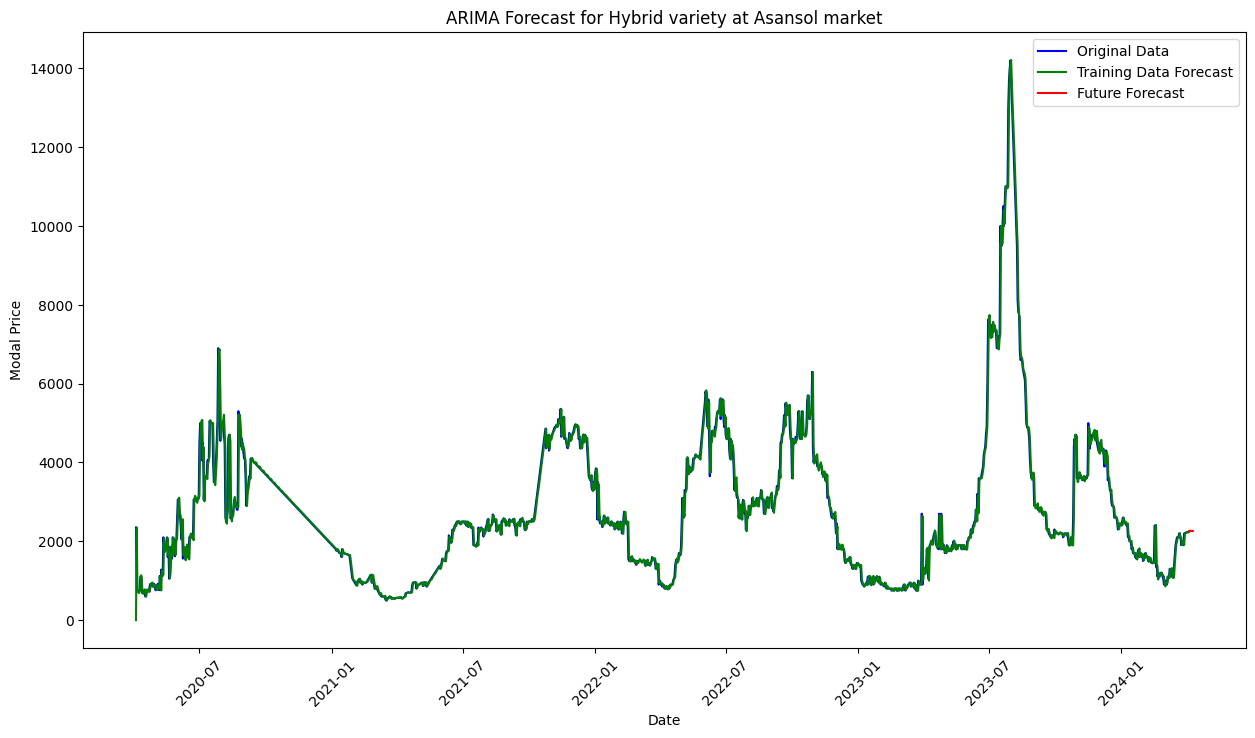

In [41]:

plt.figure(figsize=(15,8))

# Plot original data
plt.plot(df_sorted.index, df_sorted['modal_price'], label='Original Data', color='blue')

# Plot forecast for training data
plt.plot(df_sorted.index, forecast, label='Training Data Forecast', color='green')

# Plot future forecast
future_dates = pd.date_range(start=df_sorted.index[-1], periods=len(forecast1), freq='D')
plt.plot(future_dates, forecast1, label='Future Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Modal Price')
plt.title(f'ARIMA Forecast for {selected_variety} variety at {selected_market} market')
plt.legend()

plt.xticks(rotation=45)

plt.show()


In [45]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_sorted['modal_price']
y_pred = forecast

MAE = mean_absolute_error(y_true, y_pred)
MAPE = mean_absolute_percentage_error(y_true, y_pred)
RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
MSE = mean_squared_error(y_true, y_pred)

print("Mean absolute error:", MAE.round(4))
print("")
print("Mean Absolute Percentage Error:", MAPE.round(4))
print("")
print("Mean Squared Error:", MSE.round(4))
print("")
print("Root Mean Squared Error:", RMSE.round(4))


Mean absolute error: 148.4554

Mean Absolute Percentage Error: 0.0588

Mean Squared Error: 90981.9108

Root Mean Squared Error: 301.6321


MLP MODEL

In [46]:

def get_timeseries(x, n_steps=1):
    x_ts = []
    y_ts = []
    for i in range(len(x) - n_steps):
        v = x[i:(i + n_steps)]  # Slicing directly on the NumPy array
        x_ts.append(v)
        y_ts.append(x[i + n_steps])  # Next value as the target
    return np.array(x_ts), np.array(y_ts)

n_steps = 16
x_train, y_train = get_timeseries(df_sorted['modal_price'].values, n_steps)


In [47]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(n_steps,)))  # Adjusted input shape
model.add(Dense(50, activation='relu'))  # Added 'activation' here
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer="adam")

In [48]:
history = model.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1)

Epoch 1/500
41/41 [==============================] - 2s 7ms/step - loss: 1730507.2500 - val_loss: 162740.6562
Epoch 2/500
41/41 [==============================] - 0s 3ms/step - loss: 256792.8906 - val_loss: 79184.1172
Epoch 3/500
41/41 [==============================] - 0s 3ms/step - loss: 164781.7188 - val_loss: 69311.7656
Epoch 4/500
41/41 [==============================] - 0s 3ms/step - loss: 149964.1406 - val_loss: 74391.5781
Epoch 5/500
41/41 [==============================] - 0s 3ms/step - loss: 138794.0781 - val_loss: 74648.7109
Epoch 6/500
41/41 [==============================] - 0s 4ms/step - loss: 148848.0625 - val_loss: 65360.3438
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - loss: 136781.1094 - val_loss: 64928.5391
Epoch 8/500
41/41 [==============================] - 0s 3ms/step - loss: 127618.9062 - val_loss: 64990.4414
Epoch 9/500
41/41 [==============================] - 0s 4ms/step - loss: 130058.3672 - val_loss: 61367.2773
Epoch 10/500
41/41 [======

In [49]:
train_forecast = model.predict(x_train)

# Calculating metrics for training data
train_mse = mean_squared_error(y_train, train_forecast)
train_mae = mean_absolute_error(y_train, train_forecast)
train_mape = mean_absolute_percentage_error(y_train, train_forecast)
train_rmse = np.sqrt(train_mse)

print("Training Data Metrics:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("MAPE:", train_mape)
print("RMSE:", train_rmse)


46/46 [==============================] - 0s 2ms/step
Training Data Metrics:
MSE: 55858.23518512237
MAE: 138.36488497025923
MAPE: 0.05609980336395195
RMSE: 236.34346867455926


In [ ]:

initial_input = df_sorted['modal_price'].values[-n_steps:].reshape(1, -1)

forecast = []
for _ in range(horizon):
    next_prediction = model.predict(initial_input)
    forecast.append(next_prediction[0, 0])
    initial_input = np.append(initial_input[:, 1:], next_prediction, axis=1)

future_dates = pd.date_range(start=end_date + pd.Timedelta(days=1), periods=horizon)
forecast_df = pd.DataFrame({'Forecast': forecast}, index=future_dates)
forecast_df.index.name = 'Date'  # Set the name of the index
print("\nFuture Forecast:")
print(forecast_df)


1/1 [==============================] - 0s 34ms/step

Future Forecast:
               Forecast
Date                   
2024-03-29  2477.758301
2024-03-30  2516.105957
2024-03-31  2523.808350
2024-04-01  2546.161621
2024-04-02  2597.060791
2024-04-03  2668.303955
2024-04-04  2710.002441
2024-04-05  2771.960693
2024-04-06  2840.936279
2024-04-07  2900.458252
2024-04-08  2960.312988
2024-04-09  3011.299072
2024-04-10  3024.806885


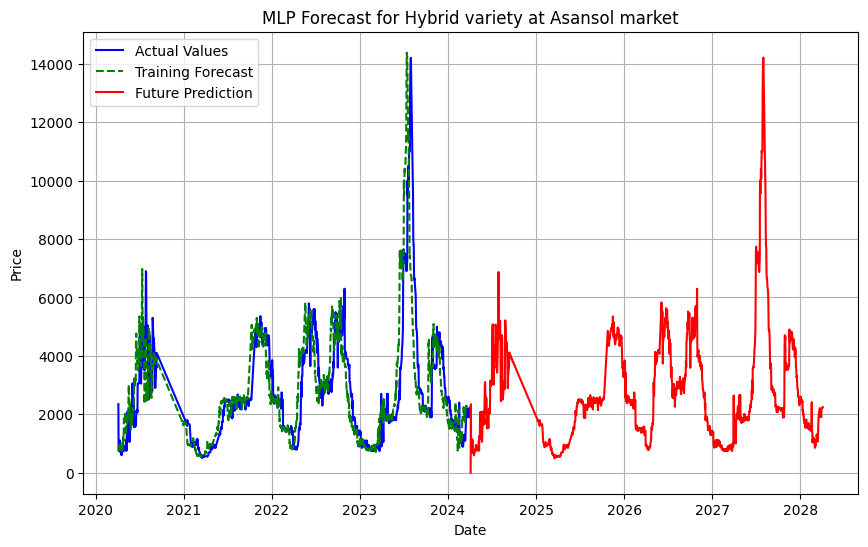

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(df_sorted.index, df_sorted['modal_price'], label='Actual Values', color='blue')

# Plot training forecast
plt.plot(df_sorted.index[:len(train_forecast)], train_forecast, label='Training Forecast', linestyle='--', color='green')

# Plot future prediction
future_index = pd.date_range(start=df_sorted.index[-1], periods=len(forecast))
plt.plot(future_index, forecast, label='Future Prediction', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'MLP Forecast for {selected_variety} variety at {selected_market} market')
plt.legend()
plt.grid(True)
plt.show()


In [55]:

a = pd.DataFrame(train_forecast, columns=["Train_forecast"])
b=len(train_forecast)

forecast_df = pd.DataFrame({
    'Date': df_sorted.index[-b:],
    'Actual Price': df_sorted['modal_price'].values[-b:],
    'Train Forecast': a["Train_forecast"]
})
future_df = pd.DataFrame({'Date': future_index, 'Future Forecast': forecast})

plot_df = pd.concat([forecast_df, future_df])

fig = px.line(plot_df, x='Date', y=['Actual Price', 'Train Forecast', 'Future Forecast'],
              title=f'MLP Forecast for {selected_variety} variety at {selected_market} market',
              labels={'value': 'Modal Price', 'variable': 'Data Type', 'Date': 'Date'})
fig.update_traces(mode='lines+markers')


fig.show()



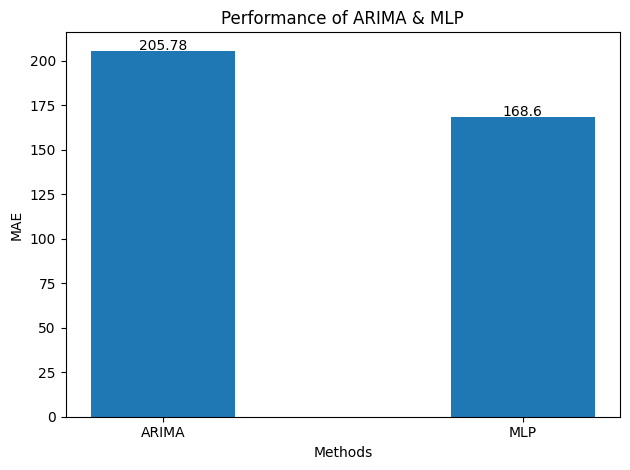

In [ ]:


# Metrics for ARIMA Model
ARIMA_MAE = MAE
ARIMA_MAPE = MAPE
ARIMA_RMSE = RMSE

# Metrics for MLP Model
MLP_MAE = train_mae
MLP_MAPE = train_mape
MLP_RMSE = train_rmse

x = ['ARIMA', "MLP"]
y = [ARIMA_MAE, MLP_MAE]

plt.bar(x, y, width=0.4)
plt.xlabel('Methods')
plt.ylabel('MAE')
plt.title('Performance of ARIMA & MLP')


for index, value in enumerate(y):
    plt.text(x=index, y=value+0.25, s=str(round(value, 2)), ha='center')

plt.tight_layout()

# Show plot
plt.show();


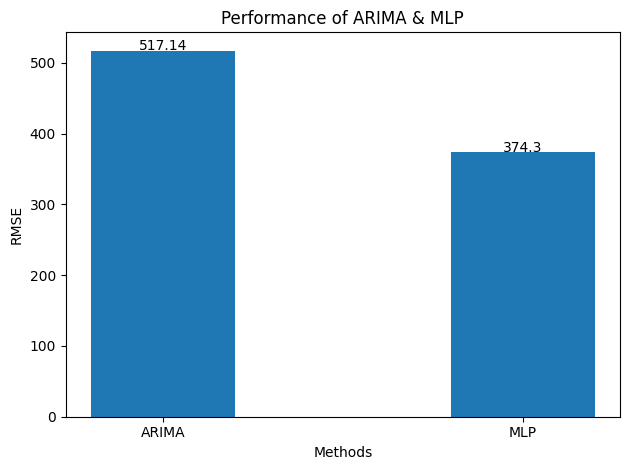

In [ ]:
x = ['ARIMA', "MLP"]
y = [ARIMA_RMSE, MLP_RMSE]

plt.bar(x, y, width=0.4)
plt.xlabel('Methods')
plt.ylabel('RMSE')
plt.title('Performance of ARIMA & MLP')

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.25, s=str(round(value, 2)), ha='center')

plt.tight_layout()

# Show plot
plt.show();



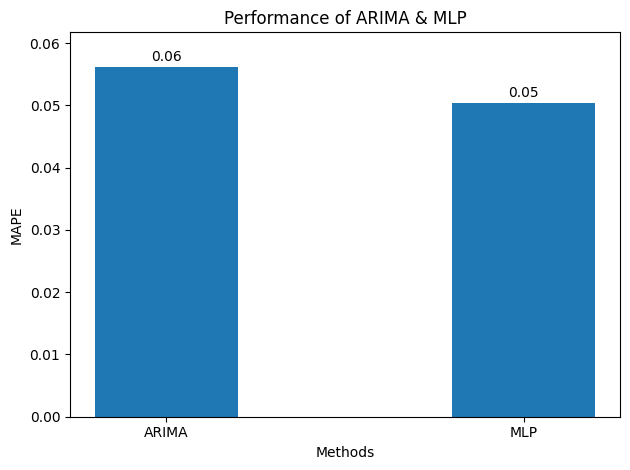

In [ ]:
import matplotlib.pyplot as plt

x = ['ARIMA', 'MLP']
y = [ARIMA_MAPE, MLP_MAPE]  # Assuming ARIMA_MAPE and MLP_MAPE are defined somewhere

plt.bar(x, y, width=0.4)
plt.xlabel('Methods')
plt.ylim(0, max(y) * 1.1)
plt.ylabel('MAPE')
plt.title('Performance of ARIMA & MLP')

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.001, s=str(round(value, 2)), ha='center')

plt.tight_layout()

# Show plot
plt.show()
